In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset= pd.read_csv("/content/wine.csv")

In [3]:
dataset.head(10)

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   
5     1    14.20   1.76  2.45        15.2        112     3.27        3.39   
6     1    14.39   1.87  2.45        14.6         96     2.50        2.52   
7     1    14.06   2.15  2.61        17.6        121     2.60        2.51   
8     1    14.83   1.64  2.17        14.0         97     2.80        2.98   
9     1    13.86   1.35  2.27        16.0         98     2.98        3.15   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
5           0.34             1.97   6.75  1.05      2.85     1450  
6           0.30             1.98   5.25  1.02      3.58     1290  
7           0.31             1.25   5.05  1.06      3.58     1295  
8           0.29             1.98   5.20  1.08      2.85     1045  
9           0.22             1.85   7.22  1.01      3.55     1045

In [4]:
dataset.tail(2)

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
176           0.53             1.46    9.3  0.60      1.62      840  
177           0.56             1.35    9.2  0.61      1.60      560

In [5]:
dataset.shape

(178, 14)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


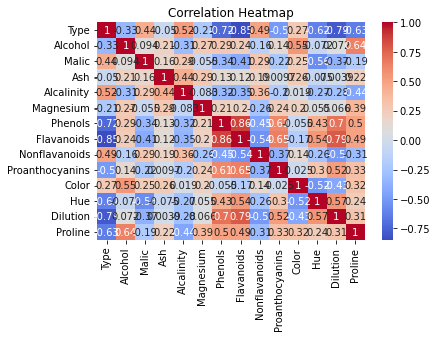

In [7]:
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
dataset['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='Count'>

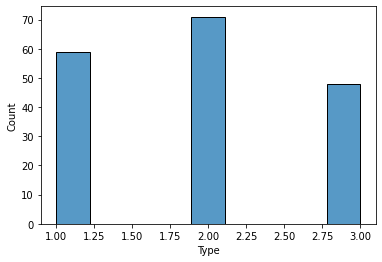

In [9]:
sns.histplot(data=dataset, x="Type", shrink=0.999)

<AxesSubplot:xlabel='Alcohol', ylabel='Count'>

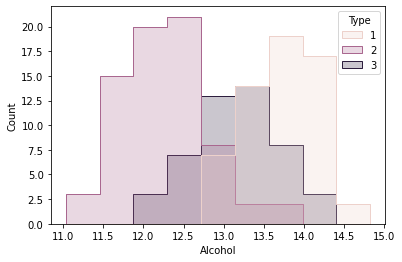

In [10]:
sns.histplot(data=dataset, x="Alcohol", hue="Type" ,element="step")


<AxesSubplot:xlabel='Ash', ylabel='Count'>

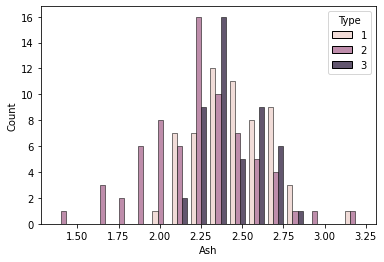

In [11]:
sns.histplot(data=dataset, x="Ash", hue="Type", multiple="dodge", shrink=.8)

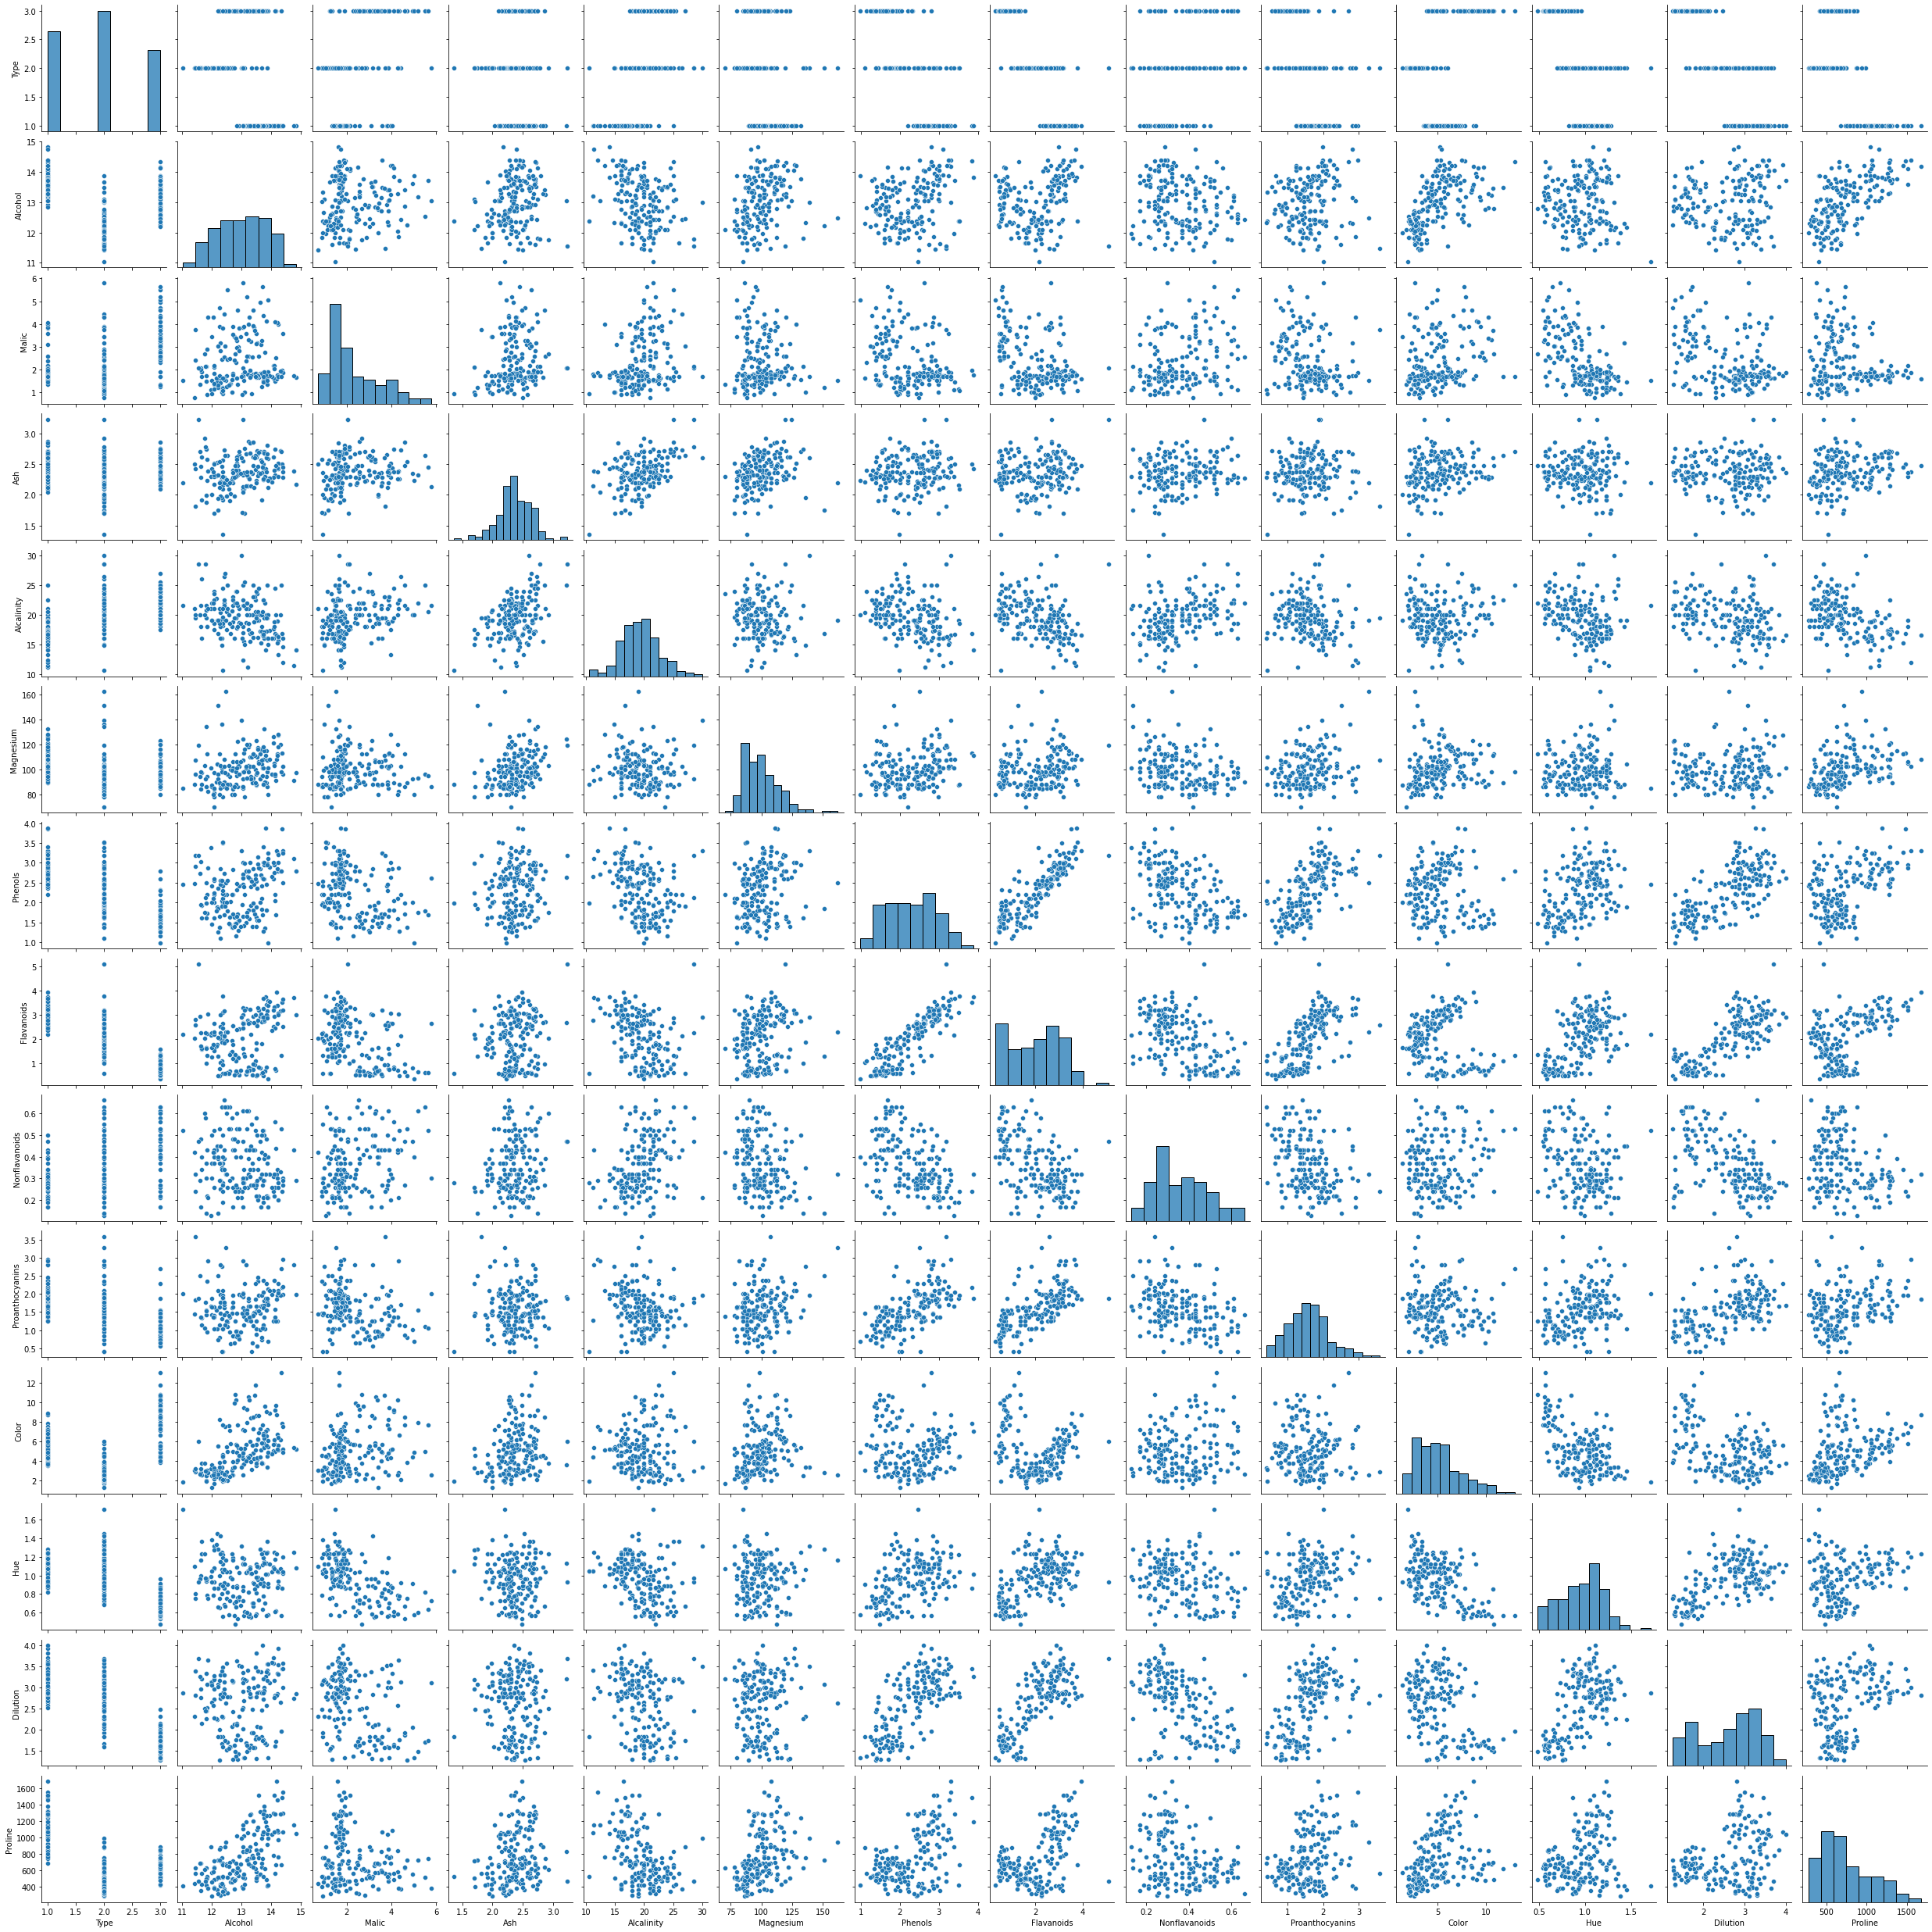

In [12]:
sns.pairplot(dataset)

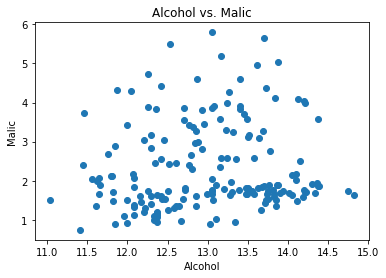

In [13]:
# create a scatter plot with Alcohol on the x-axis and Malic on the y-axis
plt.scatter(dataset['Alcohol'], dataset['Malic'])
plt.xlabel('Alcohol')
plt.ylabel('Malic')
plt.title('Alcohol vs. Malic')
plt.show()

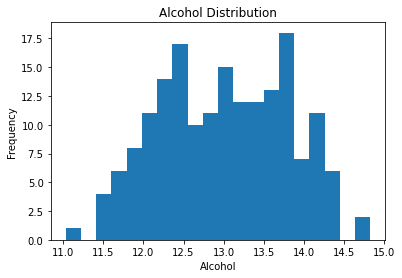

In [14]:
# create a histogram of Alcohol values
plt.hist(dataset['Alcohol'], bins=20)
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.title('Alcohol Distribution')
plt.show()

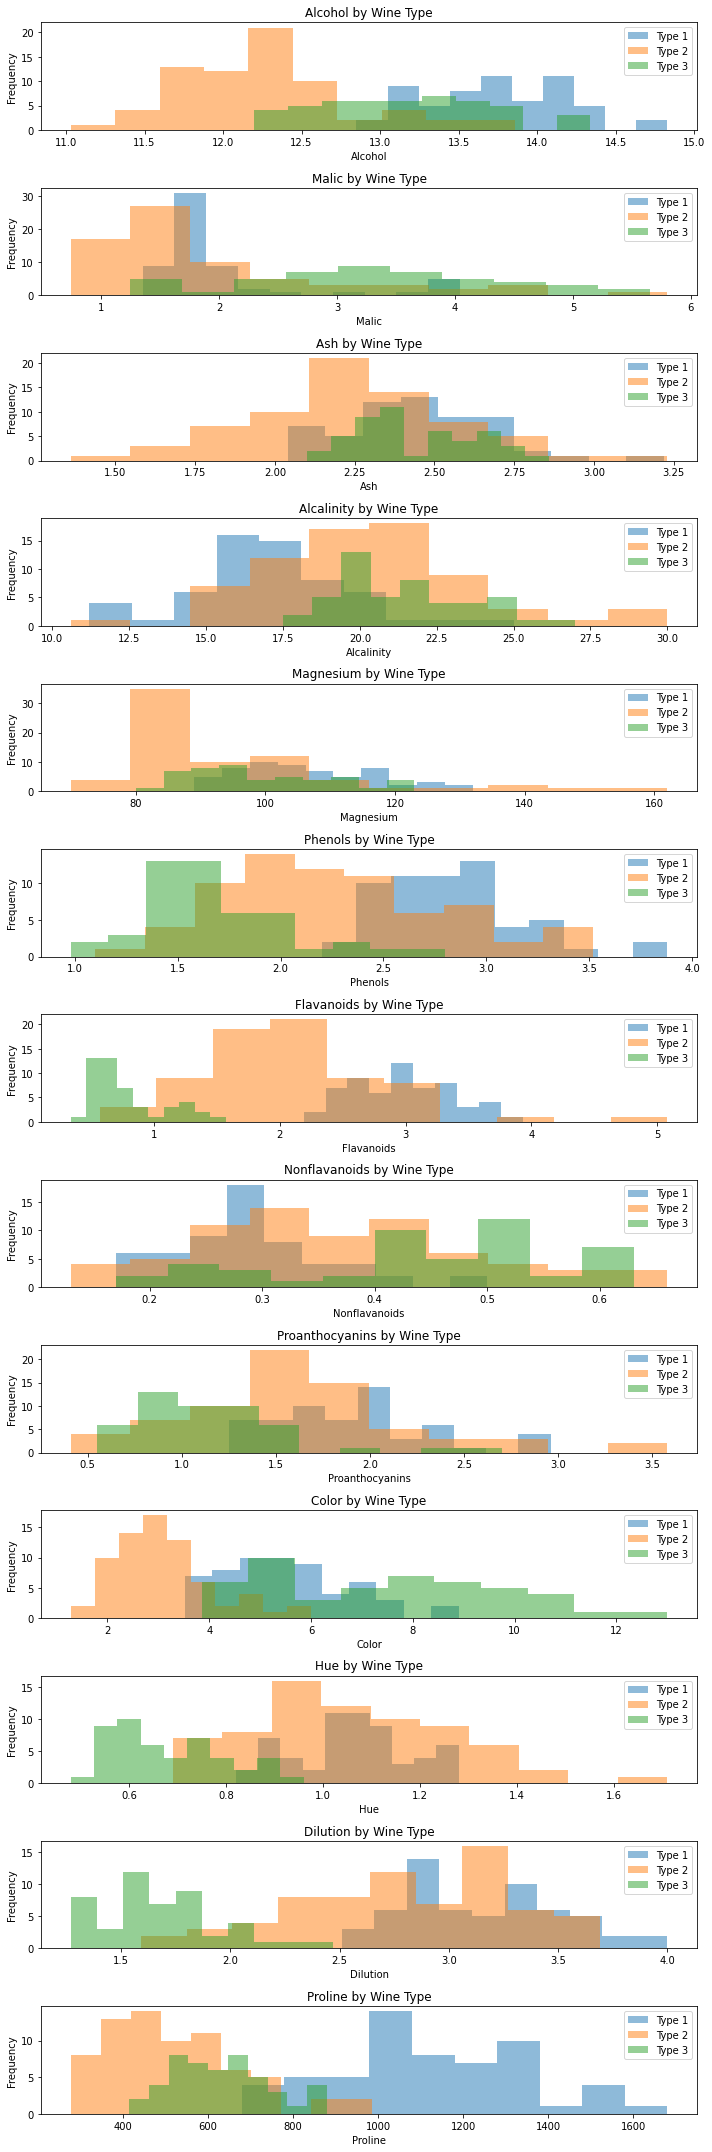

In [15]:
wine_type_labels = {
    1: 'Type 1',
    2: 'Type 2',
    3: 'Type 3'
}

# create a list of variable names
variables = dataset.columns[1:]

# create a figure with subplots for each variable
fig, axs = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 30))

# loop through each variable and create a plot for each wine type
for i, var in enumerate(variables):
    for wine_type in wine_type_labels:
       
        # create a subset of the data for the current wine type
        subset = dataset[dataset['Type'] == wine_type]
        
        # create a subplot and plot the data
        axs[i].hist(subset[var], alpha=0.5, label=wine_type_labels[wine_type])
        # add axis labels and a title for each subplot
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(var + ' by Wine Type')
    
    # add a legend to each subplot
    axs[i].legend()

# adjust the spacing between subplots and show the figure
plt.tight_layout()
plt.show()

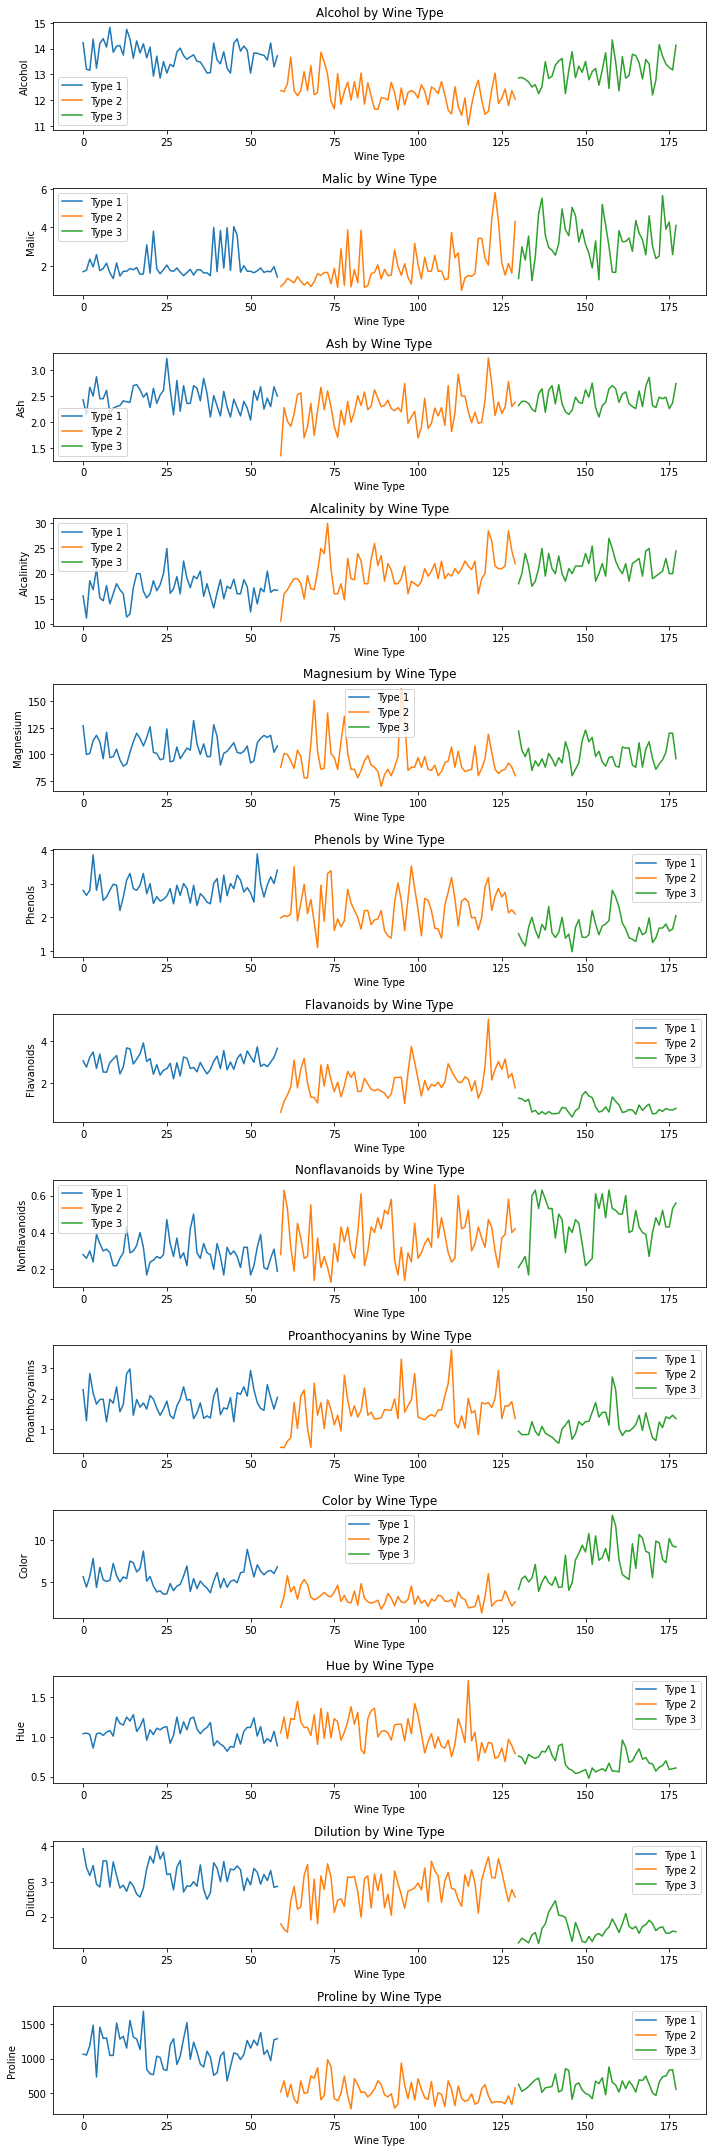

In [16]:
# create a dictionary of wine type labels
wine_type_labels = {
    1: 'Type 1',
    2: 'Type 2',
    3: 'Type 3'
}

# create a list of variable names
variables = dataset.columns[1:]

# create a figure and axes
fig, axs = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 30))

# loop through each variable and create a line plot for each wine type
for i, var in enumerate(variables):
    for wine_type in wine_type_labels:
        # create a subset of the data for the current wine type
        subset = dataset[dataset['Type'] == wine_type]
        
        # plot the data for the current wine type
        axs[i].plot(subset[var], label=wine_type_labels[wine_type])
         # add axis labels and a title for each subplot
    axs[i].set_xlabel('Wine Type')
    axs[i].set_ylabel(var)
    axs[i].set_title(var + ' by Wine Type')
    
    # add a legend to each subplot
    axs[i].legend()

# adjust the spacing between subplots and show the figure
plt.tight_layout()
plt.show()

In [17]:
#converting data into numpy
#dataset=dataset.values

In [18]:
X=dataset.iloc[:,1:]


In [19]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Applying PCA on the data 

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca_values = pca.fit_transform(X)

In [21]:
#variance estimated by PCA
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

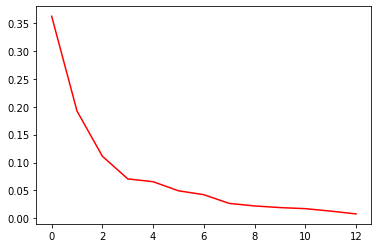

In [22]:
plt.plot(var,color="red");

In [23]:
#no. of principal comnent decided with new dataset
New_dataset=pd.concat([dataset['Type'],pd.DataFrame(pca_values[:,0:5],columns=['V1','V2','V3','V4','V5'])],axis=1)
New_dataset

Type        V1        V2        V3        V4        V5
0       1  3.316751 -1.443463 -0.165739 -0.215631  0.693043
1       1  2.209465  0.333393 -2.026457 -0.291358 -0.257655
2       1  2.516740 -1.031151  0.982819  0.724902 -0.251033
3       1  3.757066 -2.756372 -0.176192  0.567983 -0.311842
4       1  1.008908 -0.869831  2.026688 -0.409766  0.298458
..    ...       ...       ...       ...       ...       ...
173     3 -3.370524 -2.216289 -0.342570  1.058527 -0.574164
174     3 -2.601956 -1.757229  0.207581  0.349496  0.255063
175     3 -2.677839 -2.760899 -0.940942  0.312035  1.271355
176     3 -2.387017 -2.297347 -0.550696 -0.688285  0.813955
177     3 -3.208758 -2.768920  1.013914  0.596903 -0.895193

[178 rows x 6 columns]

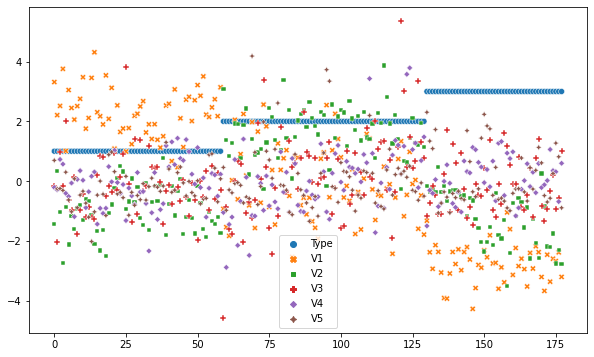

In [24]:
# Visualization of PCAs

fig=plt.figure(figsize=(10,6))
sns.scatterplot(data=New_dataset);

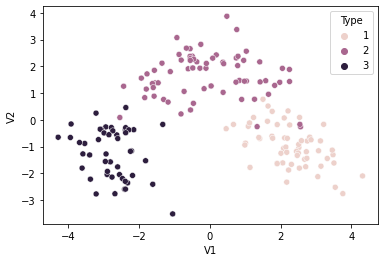

In [25]:
sns.scatterplot(data=New_dataset, x='V1', y='V2', hue='Type');


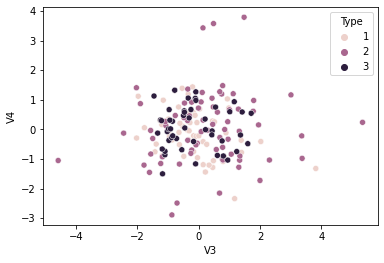

In [26]:
sns.scatterplot(data=New_dataset, x='V3', y='V4', hue='Type');

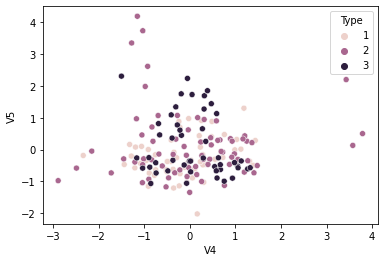

In [27]:
sns.scatterplot(data=New_dataset, x='V4', y='V5', hue='Type');

from the scatter plot it can be observed that the spread for principal component V1 and V2 adheres different areas on the other hand V3 , V4 and V4, V5 adhering the same areas so, they are  not important component, single component from v3,v4,v5 is enough to represent the same data and area.  

#Applying Hierarchical Clustering Algorithms

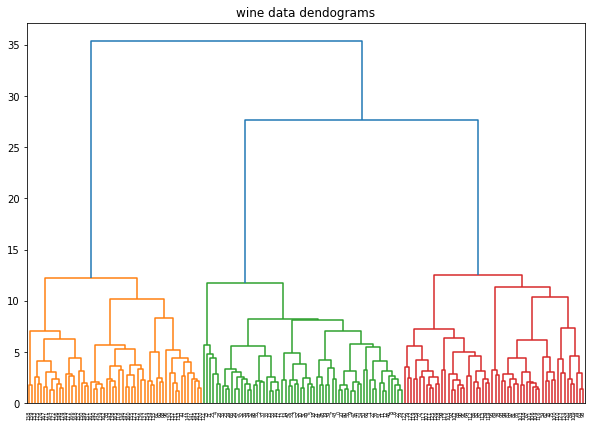

In [39]:
#creating Dendrograms
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('wine data dendograms')
dendrogram=shc.dendrogram(shc.linkage(X,method='ward'))

In [40]:
from sklearn.cluster import AgglomerativeClustering

cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(X)
labels

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [41]:
y=pd.DataFrame(cluster.fit_predict(X),columns=['Assigned_clusters'])
y['Assigned_clusters'].value_counts()
y

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Assigned_clusters
0                    2
1                    2
2                    2
3                    2
4                    2
..                 ...
173                  1
174                  1
175                  1
176                  1
177                  1

[178 rows x 1 columns]

In [50]:
# Adding clusters to dataset
newdataset=dataset.copy()
newdataset['Assigned_clusters']=cluster.labels_
newdataset

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28             2.29   5.64  1.04      3.92     1065   
1             0.26             1.28   4.38  1.05      3.40     1050   
2             0.30             2.81   5.68  1.03      3.17     1185   
3             0.24             2.18   7.80  0.86      3.45     1480   
4             0.39             1.82   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
173           0.52             1.06   7.70  0.64      1.74      740   
174           0.43             1.41   7.30  0.70      1.56      750   
175           0.43             1.35  10.20  0.59      1.56      835   
176           0.53             1.46   9.30  0.60      1.62      840   
177           0.56             1.35   9.20  0.61      1.60      560   

     Assigned_clusters  
0                    2  
1                    2  
2                    2  
3                    2  
4                    2  
..                 ...  
173                  1  
174                  1  
175                  1  
176                  1  
177                  1  

[178 rows x 15 columns]

<Figure size 1440x1440 with 0 Axes>

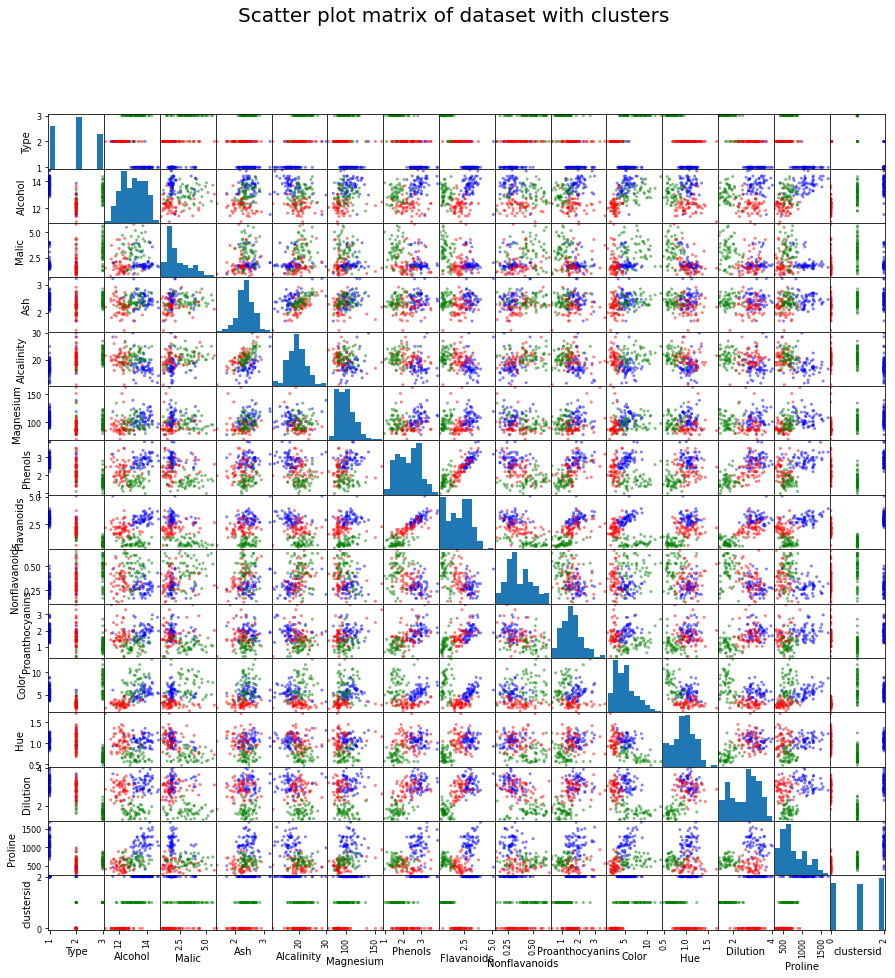

In [49]:
# create a scatter plot matrix with different colors for each cluster
plt.figure(figsize=(20, 20))
colors = ['red', 'green', 'blue'] # specify colors for each cluster
pd.plotting.scatter_matrix(newdataset, c=[colors[label] for label in cluster.labels_], figsize=(15, 15), diagonal='hist', alpha=0.5)
plt.suptitle('Scatter plot matrix of dataset with clusters', size=20)
plt.show()

#Applying K-Means Clustering Algorithms

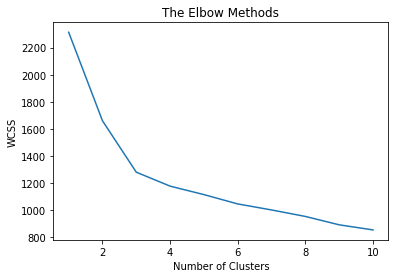

In [51]:
#FIND THE OPTIMAL NUMBER OF CLUSTERS using elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
wcss

[2314.0,
 1659.0079672511501,
 1278.7607763668148,
 1175.705192819712,
 1113.020882168209,
 1044.0780493140435,
 999.5493686263304,
 951.4917384013686,
 889.5309779249258,
 851.8813851482952]

In [64]:
# Fitting evaluated clusters in the model

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans = kmeans.fit_predict(X)
kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [65]:
# Assign clusters to the data set
kmeansdataset=dataset.copy()
kmeansdataset['kmeansclusters']=kmeans
kmeansdataset

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28             2.29   5.64  1.04      3.92     1065   
1             0.26             1.28   4.38  1.05      3.40     1050   
2             0.30             2.81   5.68  1.03      3.17     1185   
3             0.24             2.18   7.80  0.86      3.45     1480   
4             0.39             1.82   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
173           0.52             1.06   7.70  0.64      1.74      740   
174           0.43             1.41   7.30  0.70      1.56      750   
175           0.43             1.35  10.20  0.59      1.56      835   
176           0.53             1.46   9.30  0.60      1.62      840   
177           0.56             1.35   9.20  0.61      1.60      560   

     kmeansclusters  
0                 2  
1                 2  
2                 2  
3                 2  
4                 2  
..              ...  
173               0  
174               0  
175               0  
176               0  
177               0  

[178 rows x 15 columns]

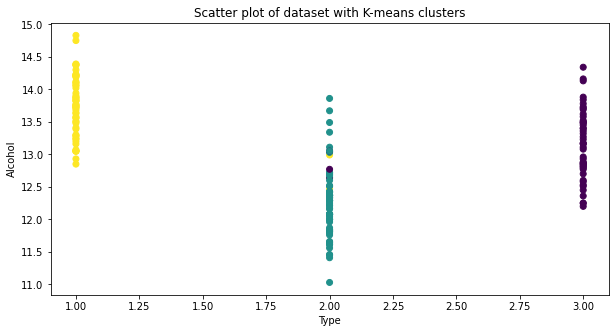

In [67]:
# plot scatter plot with different colors for each cluster
plt.figure(figsize=(10, 5))
plt.scatter(kmeansdataset['Type'], kmeansdataset['Alcohol'], c=kmeans)
plt.title('Scatter plot of dataset with K-means clusters')
plt.xlabel('Type')
plt.ylabel('Alcohol')
plt.show()

<Figure size 7200x3600 with 0 Axes>

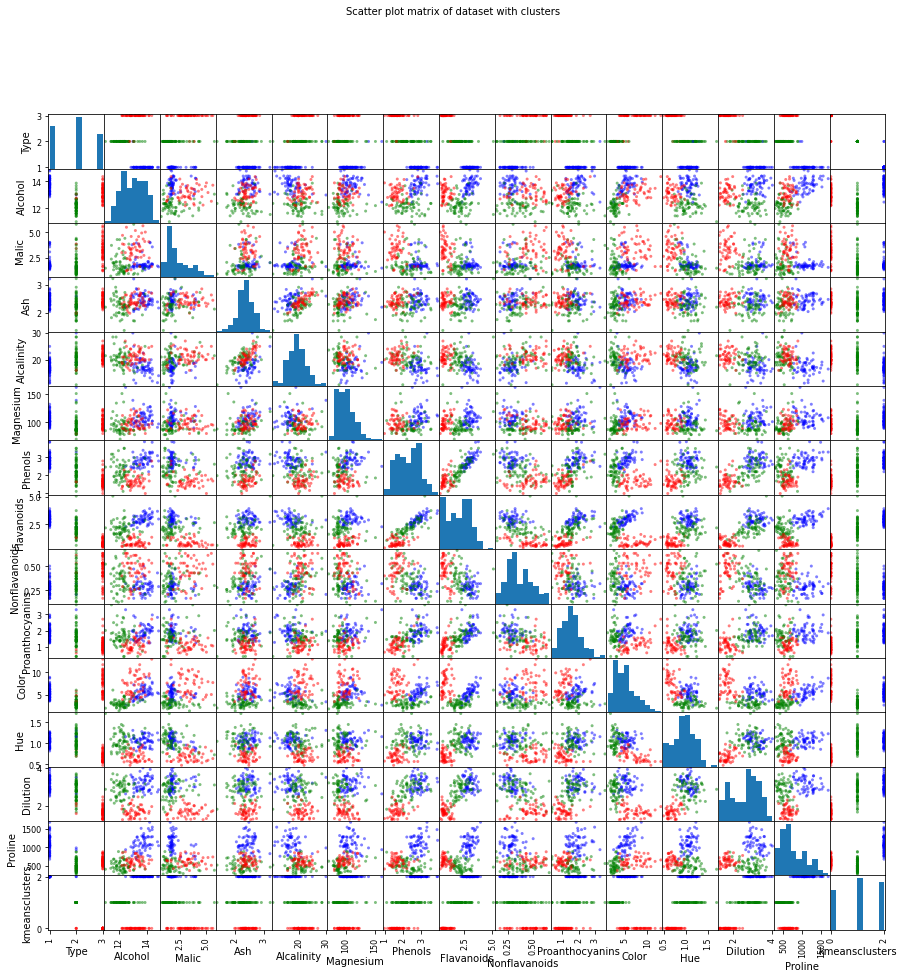

In [73]:
# create a scatter plot matrix with different colors for each cluster
plt.figure(figsize=(100, 50))
colors = ['red', 'green', 'blue'] # specify colors for each cluster
pd.plotting.scatter_matrix(kmeansdataset, c=[colors[label] for label in kmeans], figsize=(15, 15), diagonal='hist', alpha=0.5)
plt.suptitle('Scatter plot matrix of dataset with clusters', size=10)
plt.show()